# 多项式回归与正则化

产生测试数据


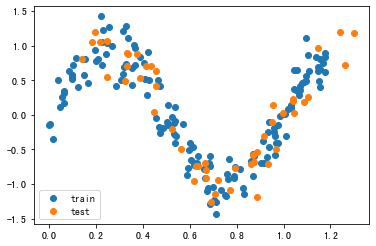

In [7]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_size = 150
test_size = 50
train_X = np.random.uniform(low=0, high=1.2, size=train_size)
test_X = np.random.uniform(low=0.1, high=1.3, size=test_size)
train_y = np.sin(train_X * 2 * np.pi) + np.random.normal(0, 0.2, train_size)
test_y = np.sin(test_X * 2 * np.pi) + np.random.normal(0, 0.2, test_size)
# y=sin(2Pi x)+高斯分布随机数

plt.scatter(train_X,train_y,label="train")
plt.scatter(test_X,test_y,label="test")
plt.legend()
plt.show()



## 线性回归


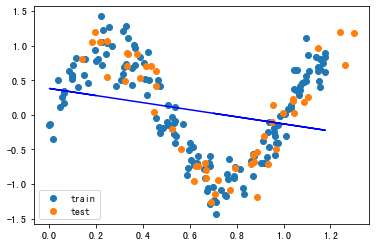

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

train_X_2D=np.array(train_X).reshape(-1, 1)
lr.fit(train_X_2D, train_y)
plt.plot(train_X, lr.predict(train_X_2D), color = 'blue') 

plt.scatter(train_X,train_y,label="train")
plt.scatter(test_X,test_y,label="test")
plt.legend()
plt.show()

## 多项式回归

2阶多项式回归 训练mse： 0.308 测试mse： 0.281
3阶多项式回归 训练mse： 0.104 测试mse： 0.332
4阶多项式回归 训练mse： 0.060 测试mse： 0.062
5阶多项式回归 训练mse： 0.045 测试mse： 0.163
6阶多项式回归 训练mse： 0.045 测试mse： 0.154
7阶多项式回归 训练mse： 0.045 测试mse： 0.099
8阶多项式回归 训练mse： 0.044 测试mse： 0.438


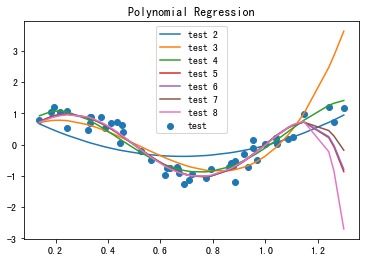

In [13]:

polynomialList=[2,3,4,5,6,7,8]
for degree in polynomialList:

    poly = PolynomialFeatures(degree) # 次数为6
    train_poly_X = poly.fit_transform(train_X.reshape(train_size, 1))
    test_poly_X = poly.fit_transform(test_X.reshape(test_size, 1))
    # fit即先对数据进行拟合，求得训练数据的固有属性，例如方差均值最值等属性，transform对数据进行归一化标准化等操作，将数据缩放映射至某个固定区间

    poly.fit(train_poly_X, train_y) 
    lrPoly = LinearRegression() 
    lrPoly.fit(train_poly_X, train_y)

    train_pred_y=lrPoly.predict(train_poly_X)
    test_pred_y=lrPoly.predict(test_poly_X)
    
    training_mse = mean_squared_error(train_pred_y, train_y)
    test_mse = mean_squared_error(test_pred_y, test_y)
    print("%d阶多项式回归"%degree,"训练mse： %.3f"%training_mse,"测试mse： %.3f"%test_mse )
    
    #plt.scatter(train_X,train_y,label="train") 
    #plt.plot(np.sort(train_X), train_pred_y[np.argsort(train_X)], label=f"train {degree}") 

    #plt.scatter(test_X,test_y,label="test")
    plt.plot(np.sort(test_X), test_pred_y[np.argsort(test_X)], label=f"test {degree} ") 

plt.scatter(test_X,test_y,label="test")
plt.title('Polynomial Regression') 
plt.legend()
plt.show()






## 数据维度


In [14]:
print(train_X.shape)
print(test_X.shape)
print(test_poly_X.shape)
print(test_X)
print(test_poly_X[0])
print(test_poly_X[1])

(150,)
(50,)
(50, 9)
[0.56336289 0.13860858 1.10481028 0.79221064 0.96797302 0.4453372
 1.04447276 0.18276383 0.69092675 0.67088627 0.52423376 1.29950501
 0.33223337 0.24553611 1.24204232 0.21830195 1.04221053 0.95377931
 1.04212043 0.87567285 1.0859194  1.14651111 0.45678413 0.33322513
 0.70786608 0.41186667 0.88497271 0.95173008 0.72080647 0.19605313
 0.62619825 0.86974878 0.33459434 0.66854912 0.61886521 0.37318611
 0.99741322 0.38847058 0.66521808 0.4333338  0.24498124 0.6358333
 0.93507609 0.77225743 0.32219629 0.86234102 0.88627261 1.2621961
 0.4553521  0.91715423]
[1.         0.56336289 0.31737775 0.17879884 0.10072863 0.05674677
 0.03196903 0.01801016 0.01014626]
[1.00000000e+00 1.38608582e-01 1.92123390e-02 2.66299506e-03
 3.69113969e-04 5.11623638e-05 7.09154269e-06 9.82948676e-07
 1.36245122e-07]


## ridge回归 - 正则化

[[0 1 2 3 4 5 6 7 8]]
alpha0 训练mse： 0.044 测试mse： 0.438
alpha1 训练mse： 0.186 测试mse： 0.392
alpha3 训练mse： 0.207 测试mse： 0.475
alpha5 训练mse： 0.219 测试mse： 0.469
alpha9 训练mse： 0.241 测试mse： 0.438
alpha15 训练mse： 0.268 测试mse： 0.410
alpha50 训练mse： 0.356 测试mse： 0.417
alpha100 训练mse： 0.400 测试mse： 0.453


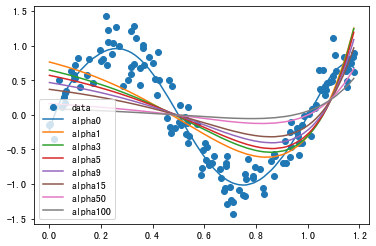

In [28]:
from sklearn.linear_model import Ridge,Lasso

degree=8
poly = PolynomialFeatures(degree) 
train_poly_X = poly.fit_transform(train_X.reshape(train_size, 1))
test_poly_X = poly.fit_transform(test_X.reshape(test_size, 1))

print(np.transpose(poly.powers_) )
plt.scatter(train_X, train_y, label="data")

alphaList=[0,1,3,5,9,15,50,100]
for alpha in alphaList:
    model = Ridge(alpha)
    #model = Lasso(alpha)
    model.fit(train_poly_X, train_y)

    train_pred_y = model.predict(train_poly_X)
    test_pred_y = model.predict(test_poly_X)

    training_mse = mean_squared_error(train_pred_y, train_y)
    test_mse = mean_squared_error(test_pred_y, test_y)
    print("alpha%d"%alpha,"训练mse： %.3f"%training_mse,"测试mse： %.3f"%test_mse )
    plt.plot(np.sort(train_X), train_pred_y[np.argsort(train_X)], label=f"alpha{alpha}")



plt.legend()
plt.show()

